### Import Libraries

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import joblib

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')

### Load the dataset

In [141]:
ielts_df = pd.read_csv('ielts_final.csv')
toefl_df = pd.read_csv('toefl_final.csv')

In [142]:
# Shape of the dataset

print('IELTS: ', ielts_df.shape)
print('TOEFL: ', toefl_df.shape)

IELTS:  (829, 16)
TOEFL:  (1229, 16)


Let's look at the columns present in both dataframes.

In [143]:
print('IELTS:\n', ielts_df.columns)
print('TOEFL:\n', toefl_df.columns)

IELTS:
 Index(['Name', 'cgpa', 'course', 'WorkExp', 'WorkExp(inYear)', 'research',
       'QUANT', 'VERBAL', 'AWA', 'GRE', 'SPEAKING', 'Listening', 'Writing',
       'Reading', 'IELTS', 'admit_reject'],
      dtype='object')
TOEFL:
 Index(['Name', 'cgpa', 'course', 'WorkExp(Months)', 'WorkExp(Years)',
       'research', 'QUANT', 'VERBAL', 'AWA', 'GRE', 'SPEAKING', 'Listening',
       'Writing', 'Reading', 'TOEFL_IELTS', 'admit_reject'],
      dtype='object')


**`Observations:`**<br><br>All the columns are same except one, the toefl df contains `toefl score` and the ielts df contains `ielts score`.

Let's check if any null values are present ?

In [144]:
print('IELTS: ', ielts_df.isna().values.any())
print('TOEFL: ', toefl_df.isna().values.any())

IELTS:  False
TOEFL:  False


**`Observations:`**<br><br> We don't have any null values, so we can proceed for further analysis.

In [145]:
ielts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             829 non-null    object 
 1   cgpa             829 non-null    float64
 2   course           829 non-null    object 
 3   WorkExp          829 non-null    int64  
 4   WorkExp(inYear)  829 non-null    float64
 5   research         829 non-null    int64  
 6   QUANT            829 non-null    int64  
 7   VERBAL           829 non-null    int64  
 8   AWA              829 non-null    float64
 9   GRE              829 non-null    int64  
 10  SPEAKING         829 non-null    float64
 11  Listening        829 non-null    float64
 12  Writing          829 non-null    float64
 13  Reading          829 non-null    float64
 14  IELTS            829 non-null    float64
 15  admit_reject     829 non-null    object 
dtypes: float64(8), int64(5), object(3)
memory usage: 103.8+ KB


In [146]:
toefl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             1229 non-null   object 
 1   cgpa             1229 non-null   float64
 2   course           1229 non-null   object 
 3   WorkExp(Months)  1229 non-null   int64  
 4   WorkExp(Years)   1229 non-null   float64
 5   research         1229 non-null   int64  
 6   QUANT            1229 non-null   int64  
 7   VERBAL           1229 non-null   int64  
 8   AWA              1229 non-null   float64
 9   GRE              1229 non-null   int64  
 10  SPEAKING         1229 non-null   int64  
 11  Listening        1229 non-null   int64  
 12  Writing          1229 non-null   int64  
 13  Reading          1229 non-null   int64  
 14  TOEFL_IELTS      1229 non-null   int64  
 15  admit_reject     1229 non-null   object 
dtypes: float64(3), int64(10), object(3)
memory usage: 153.8+ KB


In [147]:
columns = ['Name', 'CGPA', 'Course', 'WorkExp(Months)', 'WorkExp(Years)', 'Research', 'Quant', 'Verbal', 'AWA', 'GRE', 'Speaking',
           'Listening', 'Writing', 'Reading', 'Score', 'Admit/Reject']

In [148]:
res1 = {ielts_df.columns[i]: columns[i] for i in range(len(columns))}
res2 = {toefl_df.columns[i]: columns[i] for i in range(len(columns))}

In [149]:
ielts_df.rename(columns=res1, inplace=True)
toefl_df.rename(columns=res2, inplace=True)

### Combining both dataframes

Rather than working on two dataframes we can combine both and create two new columns one will indicate which exam the student has given like `IELTS` or `TOEFL` and the other column will store the `Marks` in those respective exams.

In [150]:
final_df = pd.concat([ielts_df, toefl_df], axis=0)

Min-Max score for `IELTS`

In [151]:
np.min(ielts_df['Score']), np.max(ielts_df['Score'])

(1.0, 8.5)

Min-Max score for `TOEFL`

In [152]:
np.min(toefl_df['Score']), np.max(toefl_df['Score'])

(56, 120)

As we can see the range for `IELTS lies between 1.0 - 8.5` and `TOEFL lies between 56 - 120`, using this logic we can create a category in a new column named as `Exam` with values IELTS or TOEFL depending on the `Score`.

In [153]:
def create_exam(col):
    if col < 9:
        return 'IELTS'
    else:
        return 'TOEFL'

In [154]:
# creating exam category based on Score
final_df['Exam'] = final_df['Score'].apply(create_exam)

# rearranging columns for better understanding
final_df = final_df[['Name', 'CGPA', 'Course', 'WorkExp(Months)', 'WorkExp(Years)', 'Research',
                     'Quant', 'Verbal', 'AWA', 'GRE', 'Speaking', 'Listening', 'Writing',
                     'Reading', 'Exam', 'Score', 'Admit/Reject']]
final_df

,Name,CGPA,Course,WorkExp(Months),WorkExp(Years),Research,Quant,Verbal,AWA,GRE,Speaking,Listening,Writing,Reading,Exam,Score,Admit/Reject
0,Swetha Gadde,7.50,Arizona State University - Tempe - Computer Sc...,13,1.1,1,163,152,4.0,315,6.5,9.0,6.5,9.0,IELTS,8.0,admit
1,Mahendra Kumar Kodidala,8.27,Arizona State University - Tempe - Computer En...,0,0.0,0,156,145,3.0,301,7.0,8.0,6.5,8.5,IELTS,7.0,admit
2,Naga Manasa Palaparthi,7.59,Arizona State University - Tempe - Computer Sc...,15,1.3,0,156,143,3.5,299,7.0,8.0,6.0,8.5,IELTS,7.5,reject
3,Harshit Allumolu,7.06,Arizona State University - Tempe - Computer Sc...,12,1.0,0,169,146,4.5,315,7.0,9.0,7.0,8.5,IELTS,8.0,admit
4,Adithya G,8.40,Arizona State University - Tempe - Mechnical E...,18,1.6,1,165,158,3.0,323,7.0,8.5,6.5,7.5,IELTS,7.5,admit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,Vinutha Ananth,9.00,University of Texas - Austin - Computer Science,40,3.4,0,150,155,4.0,305,29.0,30.0,28.0,28.0,TOEFL,115.0,reject
1225,Aditya Varshney,8.30,University of Texas - Austin - Computer Engine...,28,2.4,0,164,151,3.0,315,27.0,29.0,26.0,25.0,TOEFL,107.0,reject
1226,Abhinav Singh,8.27,University of Texas - Austin - Business Analytics,33,2.9,0,170,157,3.0,327,25.0,28.0,24.0,30.0,TOEFL,107.0,reject
1227,Parth Mandaliya,7.57,University of Texas - Austin - Computer Science,29,2.5,0,160,170,5.0,330,25.0,25.0,25.0,25.0,TOEFL,100.0,admit


Let's separate university and course specialization so we can use them as different features for model building.

In [155]:
def extract_uni(col):
    list1 = col.split('-')
    
    if list1[0] == 'SUNY ':
        return list1[1].strip()
    else:
        return list1[0].strip()
    
def extract_course(col):
    list1 = col.split('-')
    if len(list1) == 2:
        return list1[1].strip()
    elif len(list1) == 3:
        return list1[2].strip()
    elif len(list1) == 4:
        return list1[2].strip()+ ' ' + list1[3].strip()

In [156]:
final_df['University'] = final_df['Course'].apply(extract_uni)
final_df['Specialization'] = final_df['Course'].apply(extract_course)

In [157]:
final_df.columns

Index(['Name', 'CGPA', 'Course', 'WorkExp(Months)', 'WorkExp(Years)',
       'Research', 'Quant', 'Verbal', 'AWA', 'GRE', 'Speaking', 'Listening',
       'Writing', 'Reading', 'Exam', 'Score', 'Admit/Reject', 'University',
       'Specialization'],
      dtype='object')

In [158]:
final_df = final_df[['Name', 'University', 'Specialization', 'CGPA', 'Course', 'WorkExp(Months)', 'WorkExp(Years)', 'Research',
                     'Quant', 'Verbal', 'AWA', 'GRE', 'Speaking', 'Listening', 'Writing', 'Reading', 'Exam', 'Score', 
                     'Admit/Reject']]
final_df.head()

,Name,University,Specialization,CGPA,Course,WorkExp(Months),WorkExp(Years),Research,Quant,Verbal,AWA,GRE,Speaking,Listening,Writing,Reading,Exam,Score,Admit/Reject
0,Swetha Gadde,Arizona State University,Computer Science and Engineering,7.50,Arizona State University - Tempe - Computer Sc...,13,1.1,1,163,152,4.0,315,6.5,9.0,6.5,9.0,IELTS,8.0,admit
1,Mahendra Kumar Kodidala,Arizona State University,Computer Engineering Electrical Engineering,8.27,Arizona State University - Tempe - Computer En...,0,0.0,0,156,145,3.0,301,7.0,8.0,6.5,8.5,IELTS,7.0,admit
2,Naga Manasa Palaparthi,Arizona State University,Computer Science Big Data Systems,7.59,Arizona State University - Tempe - Computer Sc...,15,1.3,0,156,143,3.5,299,7.0,8.0,6.0,8.5,IELTS,7.5,reject
3,Harshit Allumolu,Arizona State University,Computer Science,7.06,Arizona State University - Tempe - Computer Sc...,12,1.0,0,169,146,4.5,315,7.0,9.0,7.0,8.5,IELTS,8.0,admit
4,Adithya G,Arizona State University,Mechnical Engineering,8.40,Arizona State University - Tempe - Mechnical E...,18,1.6,1,165,158,3.0,323,7.0,8.5,6.5,7.5,IELTS,7.5,admit


In [159]:
final_df.to_excel('Preprocessed & Combined/Combined.xlsx', index=False)
ielts_df.to_excel('Preprocessed & Combined/IELTS.xlsx', index=False)
toefl_df.to_excel('Preprocessed & Combined/TOEFL.xlsx', index=False)

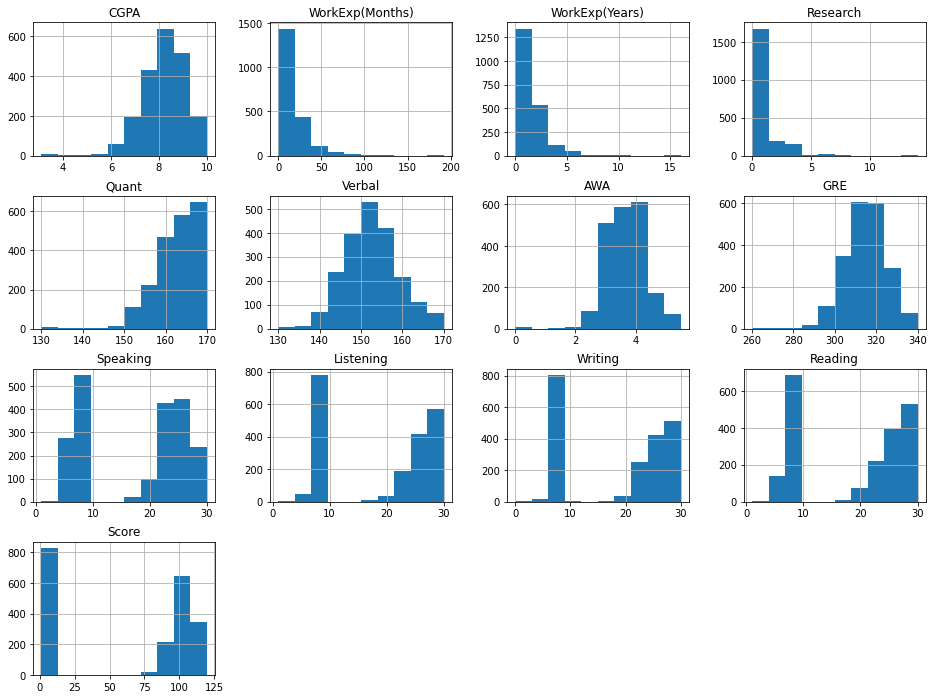

In [160]:
final_df.hist(figsize=(16, 12));

<AxesSubplot:>

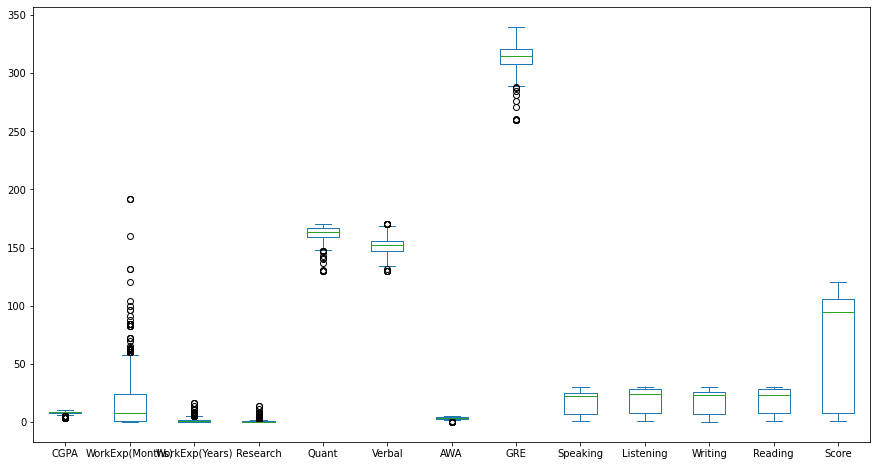

In [161]:
final_df.plot(kind='box', figsize=(15, 8))

In [162]:
final_df['Admit/Reject'].replace({'admit': 1, 'reject': 0}, inplace=True)

In [163]:
dummy_df = pd.get_dummies(final_df[['University', 'Specialization', 'Exam']])
final_df2 = pd.concat([final_df, dummy_df], axis=1)
final_df2.dropna(axis=0, inplace=True)

In [166]:
final_df2.shape

(2057, 223)

In [167]:
final_df.head()

,Name,University,Specialization,CGPA,Course,WorkExp(Months),WorkExp(Years),Research,Quant,Verbal,AWA,GRE,Speaking,Listening,Writing,Reading,Exam,Score,Admit/Reject
0,Swetha Gadde,Arizona State University,Computer Science and Engineering,7.50,Arizona State University - Tempe - Computer Sc...,13,1.1,1,163,152,4.0,315,6.5,9.0,6.5,9.0,IELTS,8.0,1
1,Mahendra Kumar Kodidala,Arizona State University,Computer Engineering Electrical Engineering,8.27,Arizona State University - Tempe - Computer En...,0,0.0,0,156,145,3.0,301,7.0,8.0,6.5,8.5,IELTS,7.0,1
2,Naga Manasa Palaparthi,Arizona State University,Computer Science Big Data Systems,7.59,Arizona State University - Tempe - Computer Sc...,15,1.3,0,156,143,3.5,299,7.0,8.0,6.0,8.5,IELTS,7.5,0
3,Harshit Allumolu,Arizona State University,Computer Science,7.06,Arizona State University - Tempe - Computer Sc...,12,1.0,0,169,146,4.5,315,7.0,9.0,7.0,8.5,IELTS,8.0,1
4,Adithya G,Arizona State University,Mechnical Engineering,8.40,Arizona State University - Tempe - Mechnical E...,18,1.6,1,165,158,3.0,323,7.0,8.5,6.5,7.5,IELTS,7.5,1


### Model Building

Train & Test sets are ready, so we can start with model training.

In [168]:
!pip install xgboost

You should consider upgrading via the 'c:\users\anike\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [169]:
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler

In [170]:
# separate X and y
X = final_df2.drop(['University', 'Name', 'Specialization', 'Exam', 'Admit/Reject', 'Course', 'WorkExp(Months)'], axis=1)
y = final_df2['Admit/Reject']

# set random seed
np.random.seed(10)

# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

# create train-test split
X_train, X_2, y_train, y_2 = train_test_split(X, y, test_size=0.3)
X_valid, X_test, y_valid, y_test = train_test_split(X_2, y_2, test_size=0.5)

# check their shape
print('Train shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('\nValidation shape: ', X_valid.shape)
print('Validation labels shape: ', y_valid.shape)
print('\nTest shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train shape:  (1439, 216)
Train labels shape:  (1439,)

Validation shape:  (309, 216)
Validation labels shape:  (309,)

Test shape:  (309, 216)
Test labels shape:  (309,)


In [171]:
!pip install imbalanced-learn

# conda install -c conda-forge imbalanced-learn

You should consider upgrading via the 'c:\users\anike\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [172]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X=X_train, y=y_train)
#y=y_train

In [173]:
pip install hyperopt

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\anike\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [174]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [175]:
from xgboost import XGBClassifier
clf=XGBClassifier(objective='binary:logistic',
                          booster='gbtree',
                          eval_metric='auc',
                          tree_method='hist',max_depth=3, learning_rate=1,reg_alpha=0,gamma=4
                          
                          )
#cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    #num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)
print("Accuracy: \n", accuracy_score(y_test, y_pred_clf))

Accuracy: 
 0.7508090614886731


In [176]:
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
models_list = []
models_list.append(('XB', XGBClassifier(objective='binary:logistic',
                         booster='gbtree',
                          eval_metric='auc',
                          tree_method='hist',max_depth=3, learning_rate=1,reg_alpha=0,gamma=4)))
results = []
algo_names = []

for name, model in models_list:
    kfold = KFold(n_splits=20, random_state=None)
   # n_splits=10, random_state=1, shuffle=True
    cross_val_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring = 'accuracy')
    results.append(cross_val_results)
    algo_names.append(name)
    info = "%s: %f (%f)" % (name, cross_val_results.mean(), cross_val_results.std())
    print(info)




XB: 0.809928 (0.111584)


In [177]:
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold

XB=XGBClassifier(objective='binary:logistic', booster='gbtree', eval_metric='auc',tree_method='hist',max_depth=3, learning_rate=1,reg_alpha=0,gamma=4)
kfold = KFold(n_splits=20, random_state=None)
   # n_splits=10, random_state=1, shuffle=True
cross_val_results = cross_val_score(XB, X_train, y_train, cv=kfold, scoring = 'accuracy')
   
info = "%s: %f (%f)" % (name, cross_val_results.mean(), cross_val_results.std())
print(info)


XB: 0.809928 (0.111584)


In [178]:
models = {'Logistic': LogisticRegression(),
          'SVC': SVC(),
          'Ridge': RidgeClassifier(),
          'SGD': SGDClassifier(),
          'KNeighbors': KNeighborsClassifier(),
          'RandomForest': RandomForestClassifier(),
          'AdaBoost': AdaBoostClassifier(),
          'GradientBoosting': GradientBoostingClassifier(),
          'DecisionTree': DecisionTreeClassifier(),
          'XGBoost': XGBClassifier(objective='binary:logistic',
                          booster='gbtree',
                          eval_metric='auc',
                          tree_method='hist',max_depth=3, learning_rate=1,reg_alpha=0,gamma=4)}

train_acc = []
test_acc = []
train_precision = []
train_recall = []
train_f1_score = []
test_precision = []
test_recall = []
test_f1_score = []

for name, model in models.items():
    print(f'Training model with {name} ...')
    model.fit(X_train, y_train)
    print(f'Scoring on train & test with {name} ...\n')
    
    # Test score
    y_preds1 = model.predict(X_train)
    train_acc.append(accuracy_score(y_train, y_preds1))
    train_precision.append(precision_score(y_train, y_preds1))
    train_recall.append(recall_score(y_train, y_preds1))
    train_f1_score.append(f1_score(y_train, y_preds1))
    
    # Train score
    y_preds2 = model.predict(X_test)
    test_acc.append(accuracy_score(y_test, y_preds2))
    test_precision.append(precision_score(y_test, y_preds2))
    test_recall.append(recall_score(y_test, y_preds2))
    test_f1_score.append(f1_score(y_test, y_preds2))

Training model with Logistic ...
Scoring on train & test with Logistic ...

Training model with SVC ...
Scoring on train & test with SVC ...

Training model with Ridge ...
Scoring on train & test with Ridge ...

Training model with SGD ...
Scoring on train & test with SGD ...

Training model with KNeighbors ...
Scoring on train & test with KNeighbors ...

Training model with RandomForest ...
Scoring on train & test with RandomForest ...

Training model with AdaBoost ...
Scoring on train & test with AdaBoost ...

Training model with GradientBoosting ...
Scoring on train & test with GradientBoosting ...

Training model with DecisionTree ...
Scoring on train & test with DecisionTree ...

Training model with XGBoost ...
Scoring on train & test with XGBoost ...



In [70]:
joblib.dump(models['XGBoost']., 'XGBoost predictor.joblib')

['XGBoost predictor.joblib']

### Visualizing Results

Let's try to visualize the results for better and clear understanding. For this I created a DataFrame using the list of train and test results we stored earlier.

In [52]:
results = pd.DataFrame(index=models.keys(), data={'Train Accuracy': train_acc,
                                                  'Train Precision': train_precision,
                                                  'Train Recall': train_recall,
                                                  'Train F1 score': train_f1_score,
                                                  'Test Accuracy': test_acc,
                                                  'Test Precision': test_precision,
                                                  'Test Recall': test_recall,
                                                  'Test F1 score': test_f1_score})
results

,Train Accuracy,Train Precision,Train Recall,Train F1 score,Test Accuracy,Test Precision,Test Recall,Test F1 score
Logistic,0.791707,0.816737,0.752195,0.783139,0.708738,0.827225,0.734884,0.778325
SVC,0.803902,0.831736,0.761951,0.795316,0.708738,0.817259,0.748837,0.781553
Ridge,0.800000,0.831715,0.752195,0.789959,0.695793,0.827027,0.711628,0.765000
SGD,0.805366,0.821355,0.780488,0.800400,0.724919,0.835052,0.753488,0.792176
KNeighbors,0.777561,0.933029,0.598049,0.728894,0.582524,0.858333,0.479070,0.614925
RandomForest,0.999512,1.000000,0.999024,0.999512,0.747573,0.791489,0.865116,0.826667
AdaBoost,0.818049,0.831976,0.797073,0.814150,0.705502,0.792453,0.781395,0.786885
GradientBoosting,0.882439,0.881323,0.883902,0.882611,0.718447,0.778261,0.832558,0.804494
DecisionTree,0.999512,1.000000,0.999024,0.999512,0.702265,0.783410,0.790698,0.787037
XGBoost,0.878537,0.881139,0.875122,0.878120,0.776699,0.806723,0.893023,0.847682


In [ ]:
XGBoost	0.987491	0.987415	0.995122	0.991254	0.766990	0.799163	0.888372	0.841410

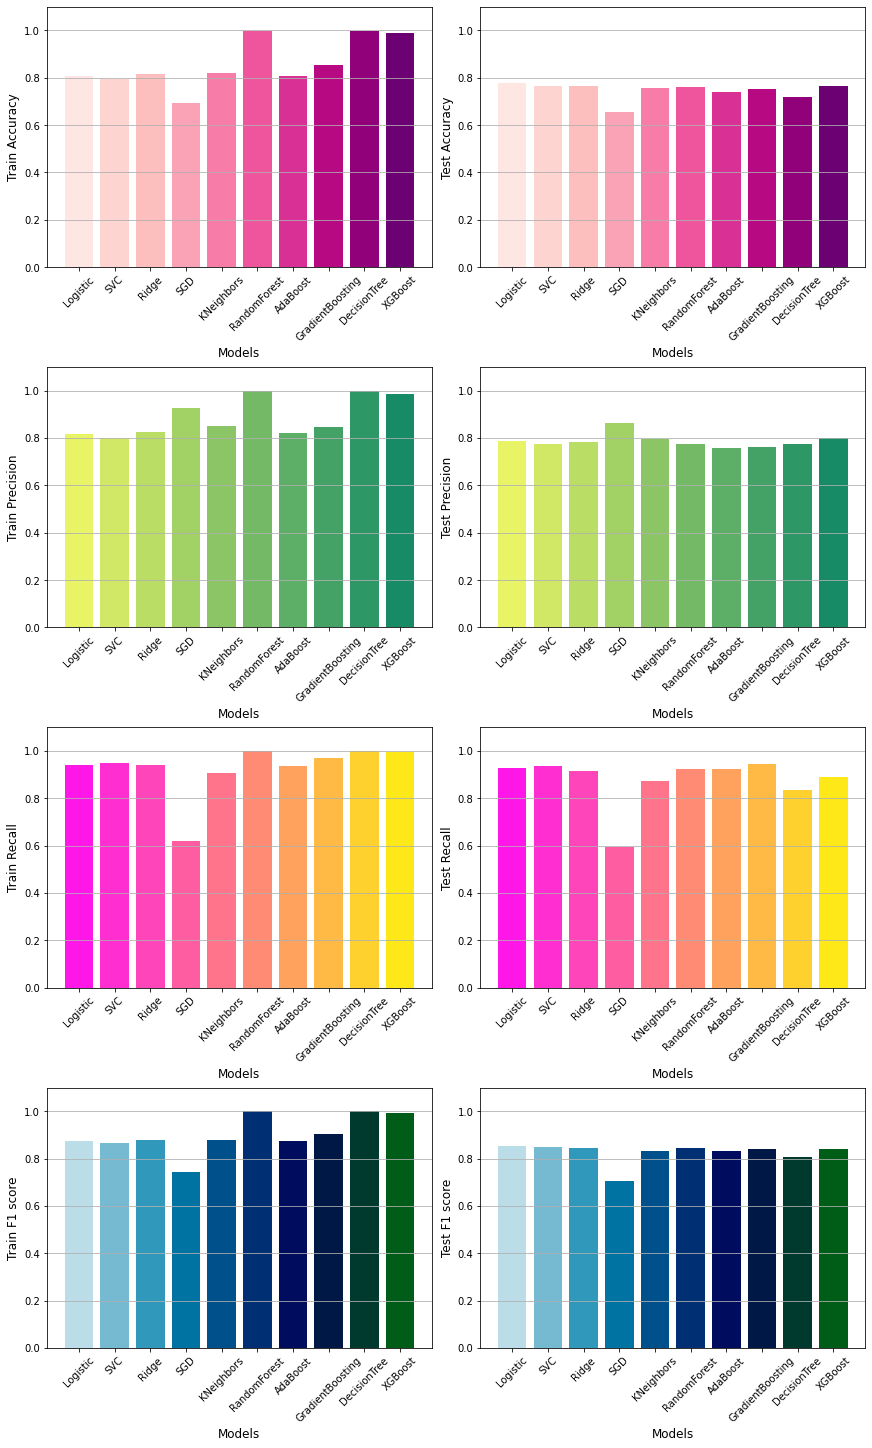

In [30]:
fig, axes = plt.subplots(nrows=4, ncols=2, sharex=False, figsize=(12, 20), constrained_layout = True)

row=4
col=2
color_pal = ['RdPu', 'summer_r', 'spring', 'ocean_r']

for i in range(row):
    for j in range(col):
        
        if j == 0:
            index = i
        else:
            index = i+4
        axes[i, j].bar(results.index, results[results.columns[index]], color=sns.color_palette(color_pal[i], len(results['Test Accuracy'])))
        axes[i, j].set_xlabel('Models', size=12)
        axes[i, j].set_ylabel(results.columns[index], size=12)
        axes[i, j].set_ylim([0, 1.1])
        axes[i, j].set_xticklabels(results.index, rotation=45)
        axes[i, j].grid(axis='y')

plt.show()

In [31]:
bag_clf = BaggingClassifier(base_estimator=models['GradientBoosting'], n_estimators=100)
bag_clf.fit(X_train, y_train)
bag_clf.score(X_train, y_train), bag_clf.score(X_test, y_test)

(0.8401667824878388, 0.7637540453074434)

## Hyperparameter Tuning

From the above visuals which displays `Accuracy`, `Precision`, `Recall`, `F1-Score` on both `Train` and `Test` data, we have observed that `RandomForest` is giving good overall results, so we'll fine tune it to see if we can improve it further.

In [102]:
from sklearn.model_selection import GridSearchCV

### Bagging Classifier with Logistic

In [103]:
bag_params = {'base_estimator': [models['Logistic']],
              'n_estimators': [10, 25, 50, 100, 200, 500, 1000],
              'max_samples': [1, 10, 50, 100],
              'bootstrap_features': [True, False],
              'bootstrap': [True, False]}

grid_search_bag = GridSearchCV(BaggingClassifier(), param_grid=bag_params, n_jobs=-1, cv=2, verbose=True)
grid_search_bag.fit(X_train, y_train)

Fitting 2 folds for each of 112 candidates, totalling 224 fits


KeyboardInterrupt: 

In [42]:
print('Grid Search score on train set: ', grid_search_bag.score(X_train, y_train))
print('Grid Search score on test set: ', grid_search_bag.score(X_test, y_test))

Grid Search score on train set:  0.7567755385684504
Grid Search score on test set:  0.7443365695792881


### Bagging Classifier with Random Forest

In [ ]:
bag_params2 = {'base_estimator': [models['RandomForest']],
              'n_estimators': [10, 25, 50, 100, 200, 500, 1000],
              'max_samples': [1, 10, 50, 100],
              'bootstrap_features': [True, False],
              'bootstrap': [True, False]}

grid_search_bag2 = GridSearchCV(BaggingClassifier(), param_grid=bag_params2, n_jobs=-1, cv=2, verbose=True)
grid_search_bag2.fit(X_train, y_train)

Fitting 2 folds for each of 112 candidates, totalling 224 fits


In [ ]:
print('Grid Search score on train set: ', grid_search_bag2.score(X_train, y_train))
print('Grid Search score on test set: ', grid_search_bag2.score(X_test, y_test))

### Bagging Classifier with Gradient Boosting

In [ ]:
bag_params3 = {'base_estimator': [models['GradientBoosting']],
              'n_estimators': [10, 25, 50, 100, 200, 500, 1000],
              'max_samples': [1, 10, 50, 100],
              'bootstrap_features': [True, False],
              'bootstrap': [True, False]}

grid_search_bag3 = GridSearchCV(BaggingClassifier(), param_grid=bag_params3, n_jobs=-1, cv=2, verbose=True)
grid_search_bag3.fit(X_train, y_train)

In [ ]:
print('Grid Search score on train set: ', grid_search_bag3.score(X_train, y_train))
print('Grid Search score on test set: ', grid_search_bag3.score(X_test, y_test))

### Bagging Classifer with XGBoost

In [104]:
bag_params4 = {'base_estimator': [models['XGBoost']],
              'n_estimators': [10, 25, 50, 100, 200, 500, 1000],
              'max_samples': [1, 10, 50, 100],
              'bootstrap_features': [True, False],
              'bootstrap': [True, False]}

grid_search_bag4 = GridSearchCV(BaggingClassifier(), param_grid=bag_params4, n_jobs=-1, cv=2, verbose=True)
grid_search_bag4.fit(X_train, y_train)

Fitting 2 folds for each of 112 candidates, totalling 224 fits


KeyboardInterrupt: 

In [ ]:
print('Grid Search score on train set: ', grid_search_bag4.score(X_train, y_train))
print('Grid Search score on test set: ', grid_search_bag4.score(X_test, y_test))

### ANN (Artificial Neural Network)

In [110]:
import tensorflow as tf
from tensorflow import keras

tf_model = keras.models.Sequential()
tf_model.add(keras.layers.Input(shape=(None, X.shape[1])))
tf_model.add(keras.layers.Dense(512, activation='relu'))
tf_model.add(keras.layers.Dense(256, activation='relu'))
tf_model.add(keras.layers.Dense(128, activation='relu'))
tf_model.add(keras.layers.Dense(64, activation='relu'))
tf_model.add(keras.layers.Dense(1, activation='sigmoid'))

### Summary of Model

In [111]:
# You can get the summary of model by calling summary() on it.

tf_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, None, 512)         111104    
                                                                 
 dense_24 (Dense)            (None, None, 256)         131328    
                                                                 
 dense_25 (Dense)            (None, None, 128)         32896     
                                                                 
 dense_26 (Dense)            (None, None, 64)          8256      
                                                                 
 dense_27 (Dense)            (None, None, 1)           65        
                                                                 
Total params: 283,649
Trainable params: 283,649
Non-trainable params: 0
_________________________________________________________________


In [112]:
tf_model.compile(loss=keras.losses.binary_crossentropy,
                 optimizer=keras.optimizers.Adam(),
                 metrics=['accuracy'])

In [113]:
history = tf_model.fit(X_train, 
                       y_train, 
                       epochs=100,
                       validation_data=(X_valid, y_valid))

Epoch 1/100
45/45 [==============================] - 1s 7ms/step - loss: 0.5678 - accuracy: 0.7116 - val_loss: 0.5811 - val_accuracy: 0.7120
Epoch 2/100
45/45 [==============================] - 0s 4ms/step - loss: 0.4992 - accuracy: 0.7561 - val_loss: 0.5474 - val_accuracy: 0.7217
Epoch 3/100
45/45 [==============================] - 0s 4ms/step - loss: 0.4608 - accuracy: 0.7839 - val_loss: 0.5012 - val_accuracy: 0.7476
Epoch 4/100
45/45 [==============================] - 0s 4ms/step - loss: 0.4264 - accuracy: 0.8061 - val_loss: 0.4953 - val_accuracy: 0.7670
Epoch 5/100
45/45 [==============================] - 0s 4ms/step - loss: 0.3997 - accuracy: 0.8138 - val_loss: 0.4981 - val_accuracy: 0.7638
Epoch 6/100
45/45 [==============================] - 0s 4ms/step - loss: 0.3845 - accuracy: 0.8179 - val_loss: 0.5128 - val_accuracy: 0.7638
Epoch 7/100
45/45 [==============================] - 0s 4ms/step - loss: 0.3625 - accuracy: 0.8311 - val_loss: 0.5126 - val_accuracy: 0.7702
Epoch 8/100
4

Epoch 52/100
45/45 [==============================] - 0s 5ms/step - loss: 0.1495 - accuracy: 0.9249 - val_loss: 1.1896 - val_accuracy: 0.7411
Epoch 53/100
45/45 [==============================] - 0s 5ms/step - loss: 0.1441 - accuracy: 0.9291 - val_loss: 1.3074 - val_accuracy: 0.7476
Epoch 54/100
45/45 [==============================] - 0s 6ms/step - loss: 0.1518 - accuracy: 0.9319 - val_loss: 1.1342 - val_accuracy: 0.7443
Epoch 55/100
45/45 [==============================] - 0s 6ms/step - loss: 0.1555 - accuracy: 0.9208 - val_loss: 1.3047 - val_accuracy: 0.7282
Epoch 56/100
45/45 [==============================] - 0s 6ms/step - loss: 0.1344 - accuracy: 0.9423 - val_loss: 1.2957 - val_accuracy: 0.7411
Epoch 57/100
45/45 [==============================] - 0s 6ms/step - loss: 0.1568 - accuracy: 0.9249 - val_loss: 1.1287 - val_accuracy: 0.7314
Epoch 58/100
45/45 [==============================] - 0s 5ms/step - loss: 0.1366 - accuracy: 0.9333 - val_loss: 1.4546 - val_accuracy: 0.7476
Epoch 

In [114]:
tf_model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 3ms/step - loss: 1.8997 - accuracy: 0.7605


[1.8996837139129639, 0.7605177760124207]

In [115]:
tf_model.metrics_names

['loss', 'accuracy']

## Tabnet

In [118]:
import pytorch_tabnet
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, accuracy_score

In [120]:
# define the model
clf1_nopreproc = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":10, # how to use learning rate scheduler
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax' # "sparsemax"
                      )

# fit the model 
clf1_nopreproc.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    eval_name=['train', 'valid'],
    eval_metric=['auc','accuracy'],
    max_epochs=1000 , patience=50,
    batch_size=256, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False
)  

epoch 0  | loss: 0.75759 | train_auc: 0.61525 | train_accuracy: 0.3016  | valid_auc: 0.58125 | valid_accuracy: 0.31068 |  0:00:00s
epoch 1  | loss: 0.69465 | train_auc: 0.6491  | train_accuracy: 0.2877  | valid_auc: 0.58963 | valid_accuracy: 0.30421 |  0:00:00s
epoch 2  | loss: 0.69596 | train_auc: 0.66807 | train_accuracy: 0.2877  | valid_auc: 0.61794 | valid_accuracy: 0.30421 |  0:00:01s
epoch 3  | loss: 0.69084 | train_auc: 0.67728 | train_accuracy: 0.2877  | valid_auc: 0.64584 | valid_accuracy: 0.30421 |  0:00:01s
epoch 4  | loss: 0.69082 | train_auc: 0.67856 | train_accuracy: 0.29117 | valid_auc: 0.64839 | valid_accuracy: 0.30421 |  0:00:02s
epoch 5  | loss: 0.67988 | train_auc: 0.65752 | train_accuracy: 0.29117 | valid_auc: 0.62303 | valid_accuracy: 0.30421 |  0:00:02s
epoch 6  | loss: 0.67405 | train_auc: 0.65432 | train_accuracy: 0.33495 | valid_auc: 0.60426 | valid_accuracy: 0.32362 |  0:00:03s
epoch 7  | loss: 0.68227 | train_auc: 0.65777 | train_accuracy: 0.33565 | valid_auc

epoch 63 | loss: 0.29495 | train_auc: 0.92484 | train_accuracy: 0.81167 | valid_auc: 0.76269 | valid_accuracy: 0.68932 |  0:00:39s
epoch 64 | loss: 0.3144  | train_auc: 0.9193  | train_accuracy: 0.82418 | valid_auc: 0.75492 | valid_accuracy: 0.68932 |  0:00:39s
epoch 65 | loss: 0.30355 | train_auc: 0.92862 | train_accuracy: 0.83461 | valid_auc: 0.76452 | valid_accuracy: 0.7055  |  0:00:40s
epoch 66 | loss: 0.30054 | train_auc: 0.93887 | train_accuracy: 0.85059 | valid_auc: 0.76645 | valid_accuracy: 0.71197 |  0:00:41s
epoch 67 | loss: 0.27362 | train_auc: 0.94532 | train_accuracy: 0.86518 | valid_auc: 0.77481 | valid_accuracy: 0.69256 |  0:00:42s
epoch 68 | loss: 0.28858 | train_auc: 0.94534 | train_accuracy: 0.86449 | valid_auc: 0.76818 | valid_accuracy: 0.70227 |  0:00:42s
epoch 69 | loss: 0.27157 | train_auc: 0.94812 | train_accuracy: 0.86518 | valid_auc: 0.76482 | valid_accuracy: 0.69903 |  0:00:43s
epoch 70 | loss: 0.25917 | train_auc: 0.94702 | train_accuracy: 0.8492  | valid_auc

epoch 126| loss: 0.14855 | train_auc: 0.99015 | train_accuracy: 0.93885 | valid_auc: 0.75626 | valid_accuracy: 0.74434 |  0:01:19s
epoch 127| loss: 0.15508 | train_auc: 0.99182 | train_accuracy: 0.94163 | valid_auc: 0.76054 | valid_accuracy: 0.73786 |  0:01:20s
epoch 128| loss: 0.15236 | train_auc: 0.99143 | train_accuracy: 0.94997 | valid_auc: 0.76336 | valid_accuracy: 0.73139 |  0:01:20s
epoch 129| loss: 0.15678 | train_auc: 0.99214 | train_accuracy: 0.94927 | valid_auc: 0.76611 | valid_accuracy: 0.73786 |  0:01:21s
epoch 130| loss: 0.12694 | train_auc: 0.99317 | train_accuracy: 0.94302 | valid_auc: 0.75626 | valid_accuracy: 0.73139 |  0:01:22s
epoch 131| loss: 0.13871 | train_auc: 0.99322 | train_accuracy: 0.94232 | valid_auc: 0.75908 | valid_accuracy: 0.74434 |  0:01:22s
epoch 132| loss: 0.136   | train_auc: 0.99343 | train_accuracy: 0.94441 | valid_auc: 0.75631 | valid_accuracy: 0.74434 |  0:01:23s
epoch 133| loss: 0.12586 | train_auc: 0.99299 | train_accuracy: 0.94302 | valid_auc

BEST ACCURACY SCORE ON VALIDATION SET : 0.7508090614886731
BEST ACCURACY SCORE ON TEST SET : 0.7119741100323624


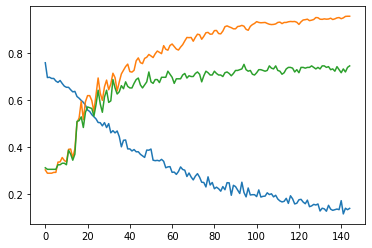

In [123]:
# plot losses
plt.plot(clf1_nopreproc.history['loss'])

# plot accuracy
plt.plot(clf1_nopreproc.history['train_accuracy'])
plt.plot(clf1_nopreproc.history['valid_accuracy'])

# find and plot feature importance
y_pred = clf1_nopreproc.predict(X_test)
clf1_nopreproc.feature_importances_
# feat_importances = pd.Series(clf1_nopreproc.feature_importances_, index=final_df2.columns)
# feat_importances.nlargest(20).plot(kind='barh')


# determine best accuracy for test set
preds = clf1_nopreproc.predict(X_test)
test_acc = accuracy_score(preds, y_test)

# determine best accuracy for validation set
preds_valid = clf1_nopreproc.predict(X_valid)
valid_acc = accuracy_score(preds_valid, y_valid)

print(f"BEST ACCURACY SCORE ON VALIDATION SET : {valid_acc}")
print(f"BEST ACCURACY SCORE ON TEST SET : {test_acc}")

### Feature Importance

In [ ]:
feature_imp_df = pd.DataFrame({'Features': models['RandomForest'].feature_names_in_,
                               'Importance': models['RandomForest'].feature_importances_})
top_15_features = feature_imp_df.sort_values('Importance')[-15:]
top_15_features

In [ ]:
fig = px.bar(top_15_features,
             y=top_15_features['Features'],
             x=top_15_features['Importance'],
             orientation='h',
             title='Top 15 Features based on Importance',
             color=top_15_features['Importance'])

fig.update(layout_coloraxis_showscale=False)
fig.show()